In [2]:
# ipython Magic
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
housing_data = pd.read_excel('houses.xlsx')

In [4]:
housing_data.head(5)

,House,Appraised Value,Selling Price,Square Feet,Bedrooms,Bathrooms
0,1,119370.0,121870.0,2050.0,4,5
1,2,148930.0,150250.0,2200.0,4,4
2,3,130390.0,122780.0,1590.0,3,3
3,4,135700.0,144350.0,1860.0,3,3
4,5,126300.0,116200.0,1210.0,2,3


In [5]:
size = housing_data['Square Feet']
cost_final = housing_data['Selling Price']
cost_initial = housing_data['Appraised Value']
bathNum = housing_data['Bathrooms']
bedNum = housing_data['Bedrooms']

PearsonRResult(statistic=0.7494999288316321, pvalue=6.13307391899052e-28)

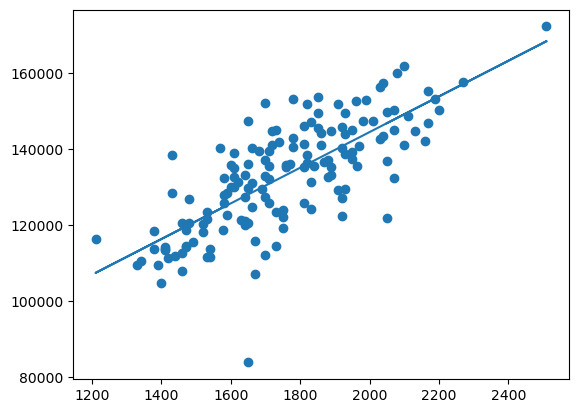

In [5]:
a, b = np.polyfit(size, cost_final, 1)
plt.scatter(size, cost_final)
plt.plot(size, a * size + b)
stats.pearsonr(size, cost_final)

PearsonRResult(statistic=0.6772362050460197, pvalue=3.379494932012972e-21)

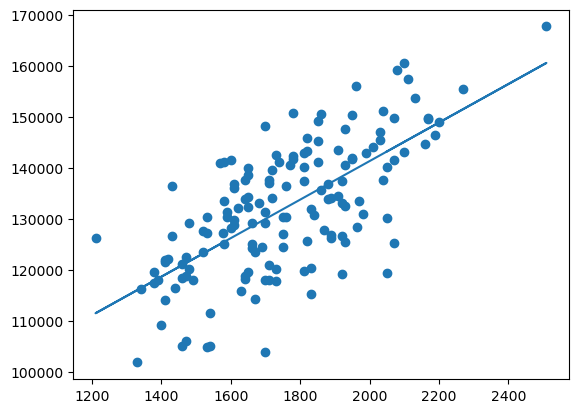

In [6]:
a, b = np.polyfit(size, cost_initial, 1)
plt.scatter(size, cost_initial)
plt.plot(size, a * size + b)
stats.pearsonr(size, cost_initial)

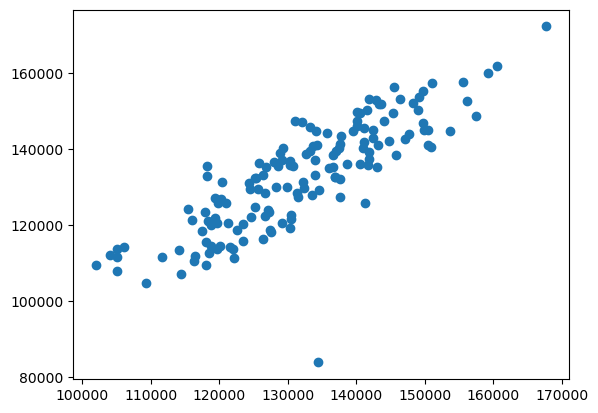

In [7]:
plt.scatter(cost_initial, cost_final)

([<matplotlib.patches.Wedge at 0x1ae1f457b80>,
 [Text(0.45309135404537054, 1.002351348025897, '1'),
  Text(1.0910904763098874, 0.139719621048238, '2'),
  Text(0.13971962104823818, -1.0910904763098874, '3'),
  Text(-1.0960372421179205, 0.09328646145364765, '4'),
  Text(-0.45309144789227496, 1.0023513056044184, '5'),
  Text(-0.09328660896761597, 1.096037229562629, '6')],
 [Text(0.24714073857020208, 0.5467370989232165, '13.5%'),
  Text(0.5951402598053931, 0.076210702389948, '18.9%'),
  Text(0.07621070238994808, -0.5951402598053931, '31.1%'),
  Text(-0.5978384957006839, 0.050883524429262354, '25.7%'),
  Text(-0.24714078975942266, 0.5467370757842281, '8.1%'),
  Text(-0.05088360489142688, 0.597838488852343, '2.7%')])

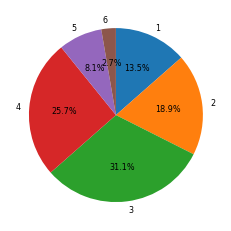

In [9]:
countBath = housing_data.groupby(by="Bathrooms").size()
plt.pie(countBath, labels=countBath.keys(), autopct='%1.1f%%', textprops= {'fontsize': 8}, startangle = 90, counterclock = False)

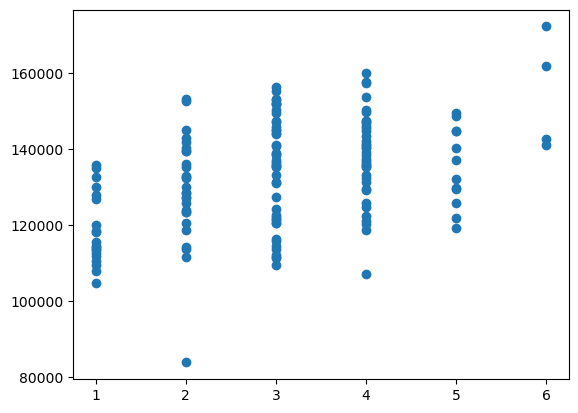

In [9]:
plt.scatter(bathNum, cost_final)

Bathrooms
1    118706.000000
2    129483.571429
3    134525.652174
4    138099.210526
5    135297.500000
6    154565.000000
dtype: float64


<AxesSubplot:xlabel='Bathrooms'>

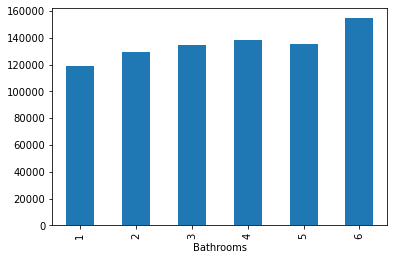

In [15]:
averageBathPrice = housing_data.groupby(by="Bathrooms")["Selling Price"].sum()
averageBathPrice = averageBathPrice/countBath
print(averageBathPrice);
averageBathPrice.plot(kind='bar')

Bathrooms
1    121112.500000
2    130922.142857
3    130959.565217
4    136744.473684
5    135191.666667
6    154630.000000
dtype: float64


<AxesSubplot:xlabel='Bathrooms'>

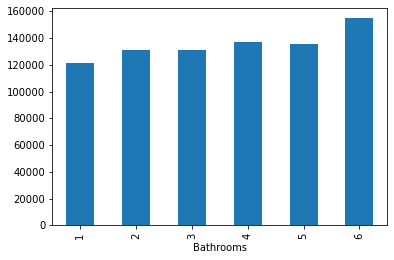

In [13]:
averageBathPriceApp = housing_data.groupby(by="Bathrooms")["Appraised Value"].sum()
averageBathPriceApp = averageBathPrice/countBath
print(averageBathPriceApp);
averageBathPriceApp.plot(kind='bar')

<AxesSubplot:xlabel='Bathrooms'>

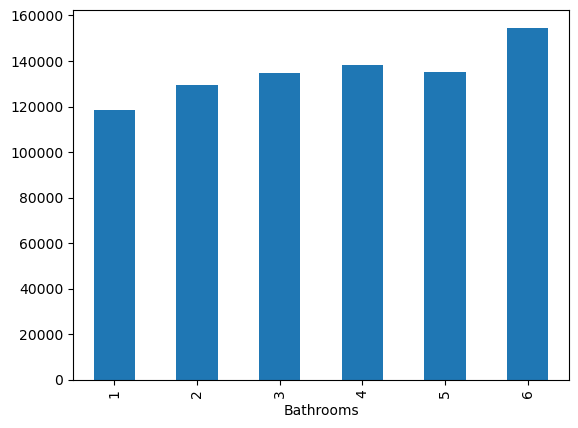

In [11]:
averageBathPrice.plot(kind='bar')

([<matplotlib.patches.Wedge at 0x1ae1f41e6a0>,
 [Text(0.8980810470988143, 0.6351774813718585, '2'),
  Text(-0.04668529570586137, -1.0990088640064994, '3'),
  Text(-0.9603155366947888, 0.5364644163246989, '4'),
  Text(-0.1628469443247583, 1.0878790708181167, '5')],
 [Text(0.48986238932662596, 0.34646044438465, '30.4%'),
  Text(-0.025464706748651655, -0.5994593803671815, '40.5%'),
  Text(-0.5238084745607938, 0.29261695435892665, '24.3%'),
  Text(-0.0888256059953227, 0.5933885840826091, '4.7%')])

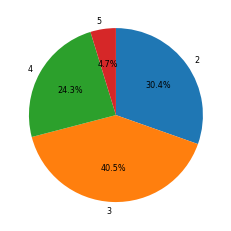

In [8]:
countBed = housing_data.groupby(by="Bedrooms").size()
plt.pie(countBed, labels=countBed.keys(), autopct='%1.1f%%', textprops= {'fontsize': 8}, startangle = 90, counterclock = False)

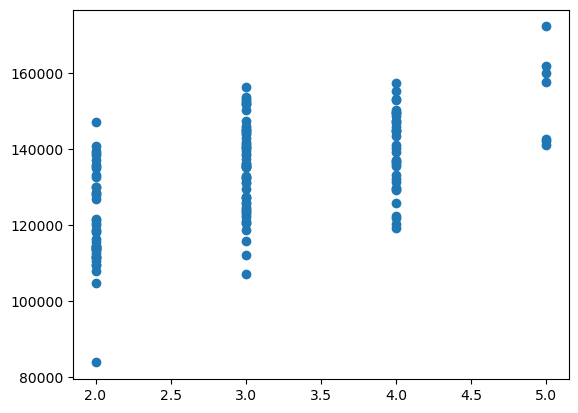

In [13]:
plt.scatter(bedNum, cost_final)

In [18]:
averageBedPrice = housing_data.groupby(by="Bedrooms")["Selling Price"].sum()
countBed = housing_data.groupby(by="Bedrooms").size()
averageBedPrice = averageBedPrice/countBed
print(averageBedPrice)

Bedrooms
2    121204.666667
3    135240.000000
4    139739.444444
5    154030.000000
dtype: float64


<AxesSubplot:xlabel='Bedrooms'>

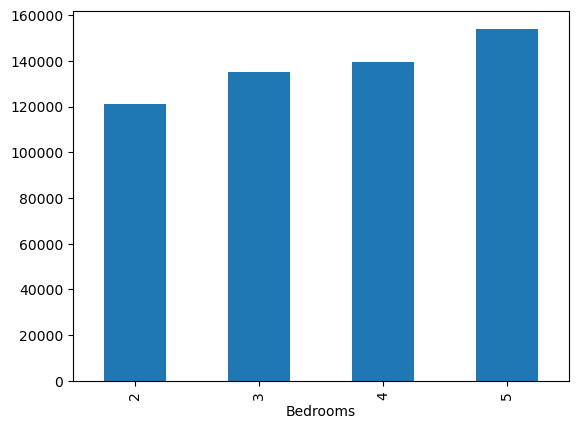

In [15]:
averageBedPrice.plot(kind='bar')

Bedrooms
2    122552.222222
3    133552.500000
4    137315.555556
5    153994.285714
dtype: float64


<AxesSubplot:xlabel='Bedrooms'>

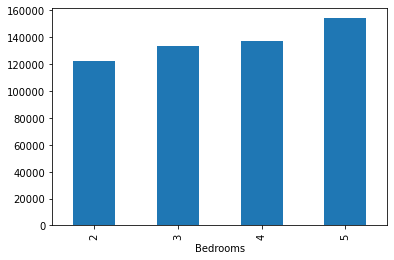

In [21]:
averageBedPriceApp = housing_data.groupby(by="Bedrooms")["Appraised Value"].sum()
countBed = housing_data.groupby(by="Bedrooms").size()
averageBedPriceApp = averageBedPriceApp/countBed
print(averageBedPriceApp)
averageBedPriceApp.plot(kind='bar')

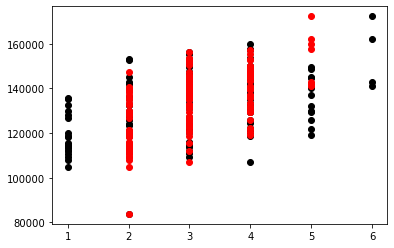

In [26]:
plt.scatter(bathNum, cost_final, color = "black")
plt.scatter(bedNum, cost_final, color = "red")
plt.show()

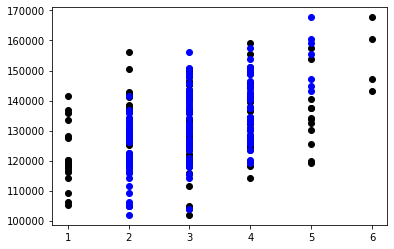

In [24]:
plt.scatter(bathNum, cost_initial, color = "black")
plt.scatter(bedNum, cost_initial, color = "blue")
plt.show()

In [17]:
averageRatio = housing_data.groupby(["Bedrooms", "Bathrooms"])["Selling Price"].sum()
countRatio = housing_data.groupby(["Bedrooms", "Bathrooms"]).size()
averageRatio = averageRatio/countRatio
print(averageRatio)

Bedrooms  Bathrooms
2         1            118706.000000
          2            118713.333333
          3            125729.375000
3         2            134585.263158
          3            136468.000000
          4            134662.857143
4         3            144715.000000
          4            139992.857143
          5            135297.500000
5         4            153316.666667
          6            154565.000000
dtype: float64


<AxesSubplot:xlabel='Bedrooms,Bathrooms'>

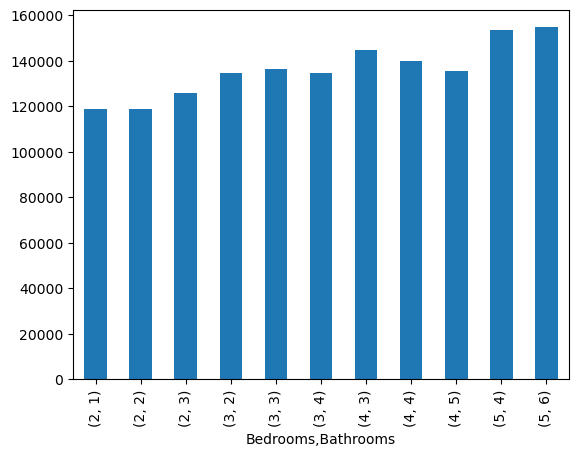

In [18]:
averageRatio.plot(kind='bar')

In [19]:
saleDiff = cost_final - cost_initial

y =  9.281023693164993  x +  -15414.556784146227


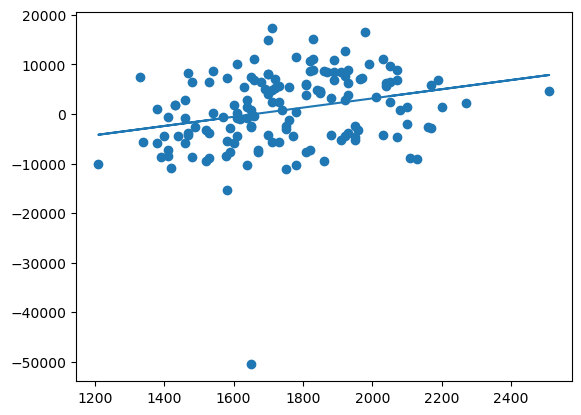

In [20]:
a, b = np.polyfit(size, saleDiff, 1)
plt.scatter(size, saleDiff)
plt.plot(size, a * size + b)
print('y = ', a, ' x + ', b)

In [21]:
stats.pearsonr(size, saleDiff)

PearsonRResult(statistic=0.2665485423572864, pvalue=0.0010578917381878423)

PearsonRResult(statistic=0.12582542520625556, pvalue=0.1275546479154417)

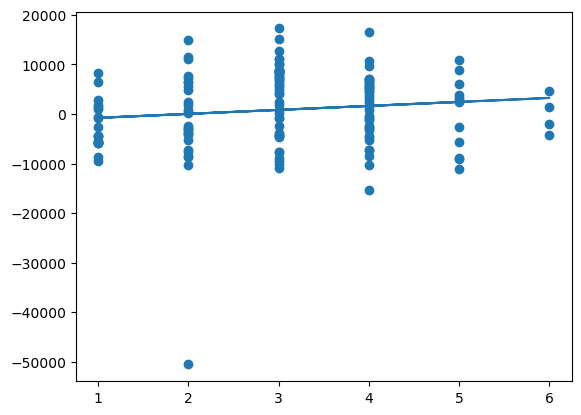

In [22]:
a, b = np.polyfit(bathNum, saleDiff, 1)
plt.scatter(bathNum, saleDiff)
plt.plot(bathNum, a * bathNum + b)
stats.pearsonr(bathNum, saleDiff)

PearsonRResult(statistic=0.14269405972859792, pvalue=0.08361350172189855)

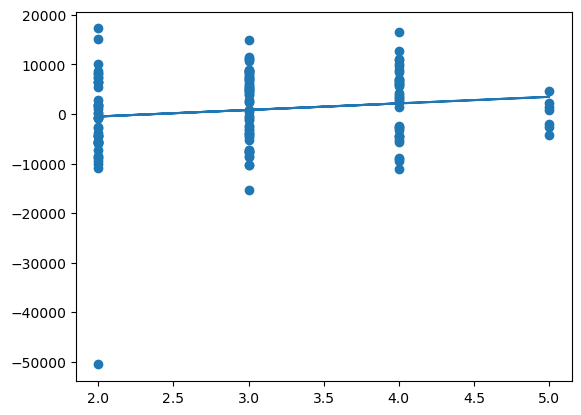

In [23]:
a, b = np.polyfit(bedNum, saleDiff, 1)
plt.scatter(bedNum, saleDiff)
plt.plot(bedNum, a * bedNum + b)
stats.pearsonr(bedNum, saleDiff)